# 📌 SuperStore Sales & Profit Analysis 

## Bussiness Problem 
A Retail superstore wants to optimize its sales and profitablity. The store owner has provided us his sales data which contains **9994 tansactions** across **21 Features**. The goal is to analyze the **sales, profit trends, and losses** to provide actionable insights on how to:
**Increase Revenue.**
**Minimze Losses.**
**Improve Delivery and prices strategy.**

## Key Insights. ⚒️
1. There are total 3 categories of product this store sells.
2. The category with highest sales is **Technology**.
3. The other two categories are **Office supplies and furnitures**.
4. There isnt much difference in sales between **Office supplies and furnitures** but **furnitures** have very low profit compare to **office supplies**.
5. There are **123 unique** products which are being sold at loss.
6. **High sales volume does not always mean profitability**, as some products with **15,000+ sales** are still sold at a loss.
7. **The correlation between discount and profit is slightly negative (-0.22), but not the main cause of losses.**

In [2]:
# Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/customers.csv', encoding='LATIN1')


### 1. Sales & Profit by Category 
    This will reinforce our key finding that Furniture has high sales but low profit.

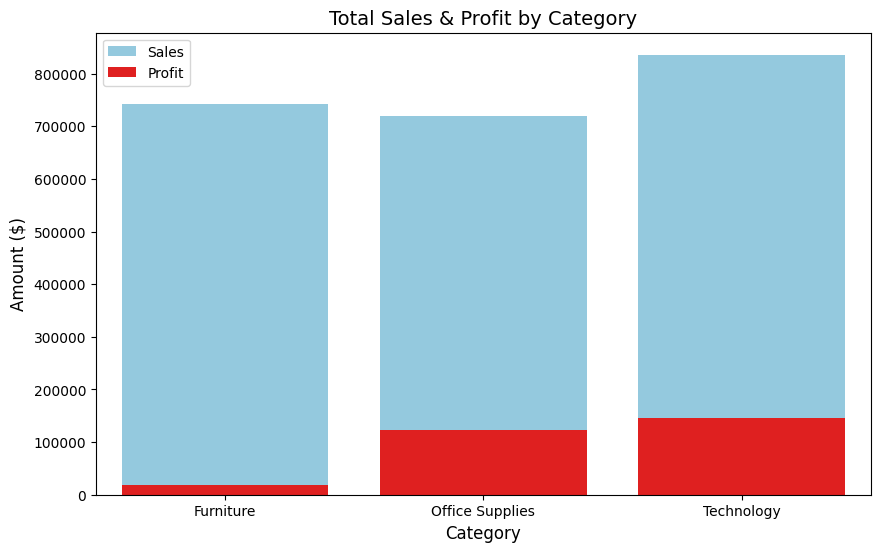

In [4]:

plt.figure(figsize=(10, 6))
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

ax = sns.barplot(data=category_summary, x='Category', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=category_summary, x='Category', y='Profit', color='red', label='Profit')

plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title('Total Sales & Profit by Category', fontsize=14)
plt.legend()
plt.show()


### 2. Profitability by Subcategory
       This will show that some subcategories are being sold at loss

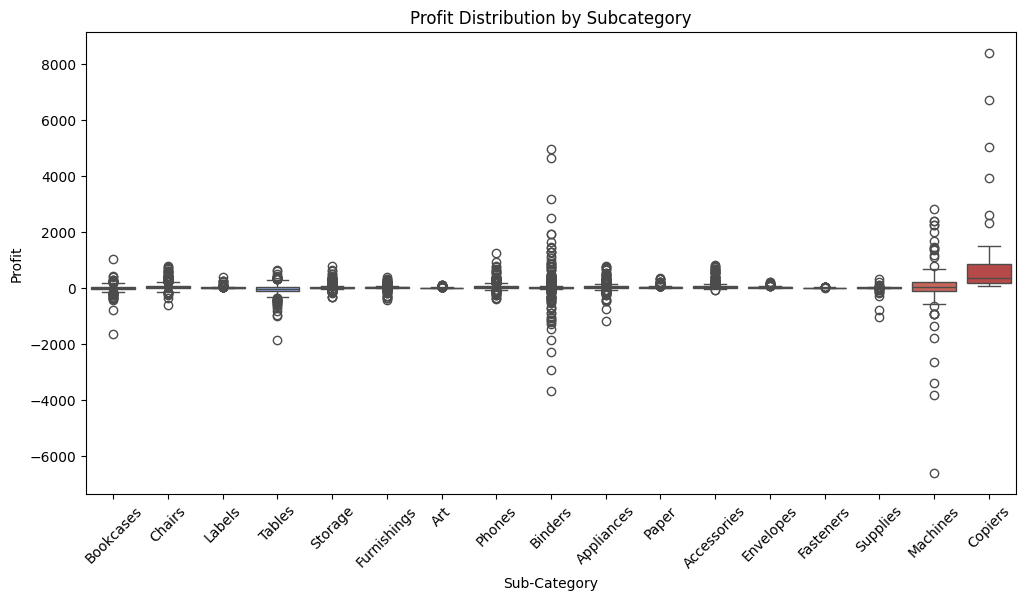

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sub-Category', y='Profit', hue ="Sub-Category", palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Profit Distribution by Subcategory')
plt.show()

### 3. Discount Impact on Profit
    This will show that higher discounts lower the profits

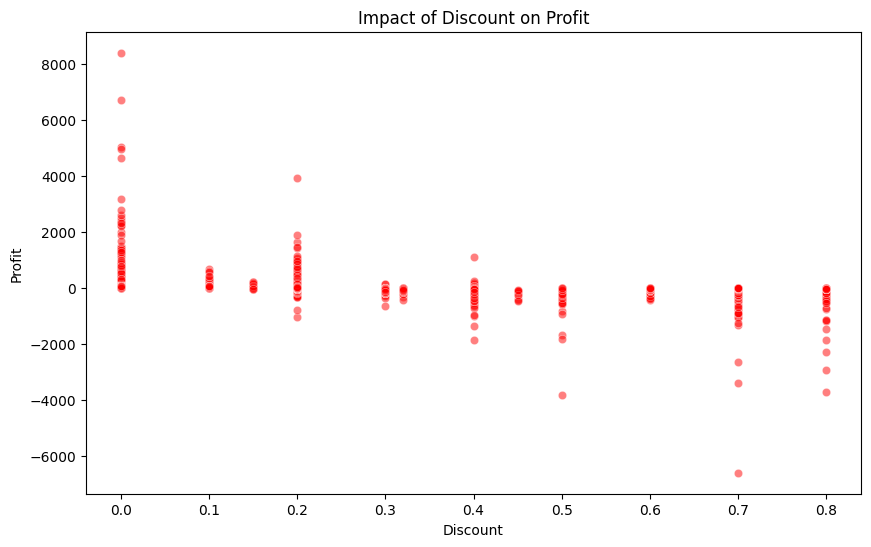

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5, color='red')
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

### 4. Sales vs. Profit 
    This will conclude that the higher sales doesn't mean higher profit

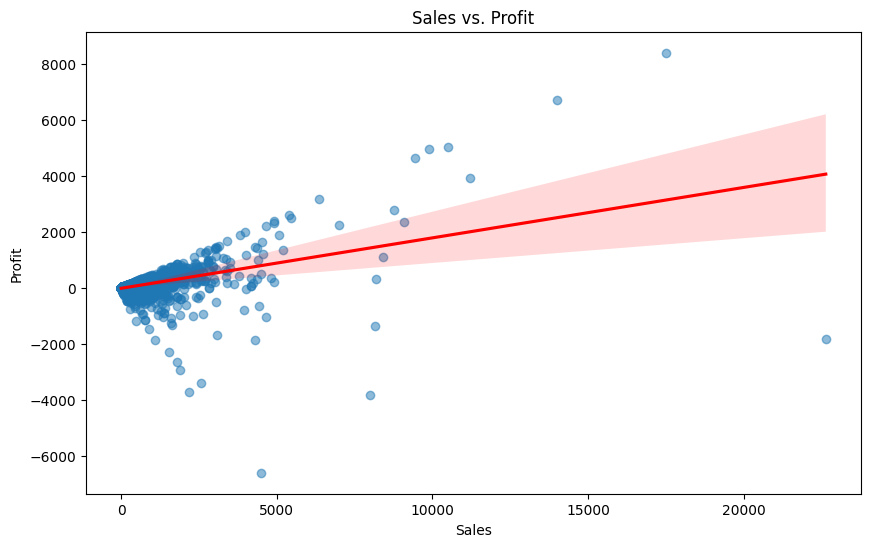

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Sales', y='Profit', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

### 5. Correlation Heatmap
    This will show the correlation between each features

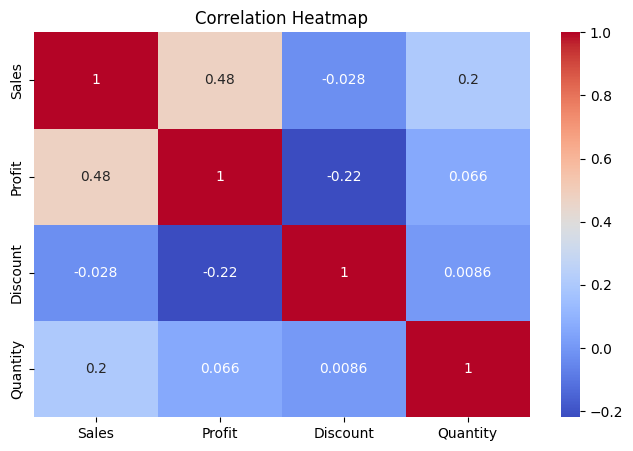

In [13]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 📌 Final Recommendations
**Based on our analysis, here are the key recommendations to improve profitability:**<br>

1️⃣ Reduce or Reevaluate Unprofitable Product Lines<br>
🛑 Issue: Certain subcategories are consistently sold below cost price, leading to losses.<br>
🔎 **Findings:**<br>

- Tables (-14.77% margin) & Bookcases (-12.66%) are sold at a loss.<br>
- Machines, Binders, and Appliances also have significant losses (~30% of transactions).<br>
✅ **Recommendation:**<br>

- Stop selling or renegotiate supplier costs for these products.<br>
- Increase prices slightly or offer bundled deals to improve margins.<br>
2️⃣ Adjust Discounting Strategy<br>
🛑 Issue: High discounts significantly reduce profitability, especially in Furniture.<br>
🔎 **Findings:**<br>

- Higher discounts lead to negative profit (scatterplot insight).<br>
- Discount distribution shows that even at 0% discount, some products are unprofitable.<br>
✅ **Recommendation:**<br>

- Implement dynamic pricing: Offer discounts only on high-margin items.<br>
- Limit discounts on Furniture subcategories that are already unprofitable.<br>
- Test volume-based discounts instead of flat percentage reductions.<br>
3️⃣ Shift Focus to High-Profit Categories (Technology)<br>
🛑 Issue: Furniture contributes high sales but low profit.<br>
🔎 **Findings:**<br>

- Technology has the highest sales and profit margin (15%).<br>
- Furniture has a high volume of sales but an overall margin of just 3%.<br>
✅ **Recommendation:**<br>

- Invest more in Technology products (marketing, inventory).<br>
- Reduce stock or focus on premium Furniture items with better margins.<br>
4️⃣ Investigate Cost Structure<br>
🛑 Issue: We don't have visibility on the exact cost per unit for each product.<br>
🔎 **Findings:**<br>

- Some products are sold at a loss even without a discount.<br>
- No shipping cost data available to analyze additional costs.<br>
✅ **Recommendation:**<br>

- Collect cost-per-unit data to analyze true profitability.<br>
- If possible, track shipping costs to see if they affect profit margins.<br>
